# Mathematical modelling of behavior

Before using a data file for modeling purposes, it is important to
collect some information about its content. The objective of this lab is to extract some descriptive statistics from a database with choice data using the package `pandas`.

We introduce some examples using the file `lpmc05.dat`. 

We first import `pandas`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading and preparing the data

The
description of the columns of the file is
available [here](https://transp-or.epfl.ch/documents/technicalReports/CS_LPMC.pdf).

In [2]:
data_file = './lpmc05.dat'
df = pd.read_csv(data_file, sep='\t')
df

,trip_id,household_id,person_n,trip_n,travel_mode,purpose,fueltype,faretype,bus_scale,survey_year,...,dur_pt_access,dur_pt_rail,dur_pt_bus,dur_pt_int,pt_interchanges,dur_driving,cost_transit,cost_driving_fuel,cost_driving_ccharge,driving_traffic_percent
0,2,0,0,2,4,3,1,1,1.0,1,...,0.203056,0.0,0.210278,0.0,0,0.236667,1.5,0.79,0.0,0.203052
1,4,0,1,2,4,3,1,4,1.0,1,...,0.203056,0.0,0.189444,0.0,0,0.229167,1.5,0.78,0.0,0.130909
2,7,0,2,1,4,3,1,3,0.0,1,...,0.109444,0.0,0.055556,0.0,0,0.059444,0.0,0.15,0.0,0.112150
3,73,14,0,2,4,3,1,5,0.0,1,...,0.077778,0.0,0.036389,0.0,0,0.061389,0.0,0.16,0.0,0.221719
4,76,15,0,0,1,3,6,1,1.0,1,...,0.188611,0.0,0.074722,0.0,0,0.142778,1.5,0.33,0.0,0.342412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,81023,17599,0,1,3,5,6,1,1.0,3,...,0.147222,0.0,0.496111,0.0,0,0.351111,1.5,1.27,0.0,0.139241
4996,81029,17600,1,4,1,3,6,1,1.0,3,...,0.100000,0.0,0.025833,0.0,0,0.171389,1.5,0.39,0.0,0.207455
4997,81050,17605,1,0,4,1,1,5,0.0,3,...,0.133056,0.1,0.000000,0.0,0,0.265556,0.0,0.60,0.0,0.259414
4998,81074,17610,1,1,4,3,2,1,1.0,3,...,0.205833,0.0,0.391667,0.0,0,0.281667,1.5,0.86,0.0,0.368836


- The database contains 5000 rows of data, corresponding to each
observation in the sample.
- It contains 32 columns, corresponding to
the available variables.

If we look at the column `purpose`, corresponding to the trip
purpose, it contains a total of 5 unique values, numbered from 1 to
5. 


In [3]:
df['purpose'].unique(),

(array([3, 5, 2, 4, 1]),)

In order to understand better the distribution of these values, we
can calculate the frequency of each value, here sorted by decreasing
order of frequency.

In [4]:
df['purpose'].value_counts()

3    2621
1     807
5     675
2     550
4     347
Name: purpose, dtype: int64

The histogram of this distribution is also useful.

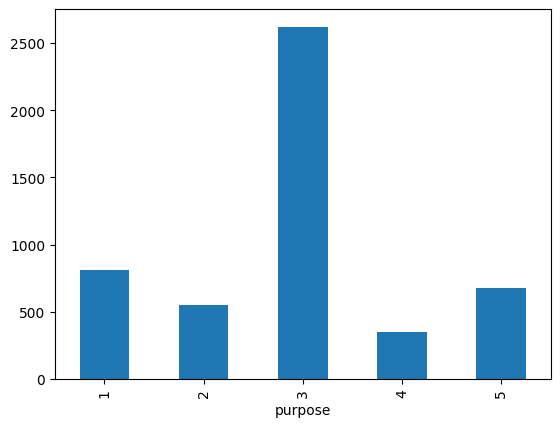

In [5]:
#ax = df['purpose'].value_counts().plot(title='purpose', kind='bar')
_ = df.groupby(['purpose']).count()['trip_id'].plot.bar(stacked=True)

We do the same for the `travel_mode` variable.

In [6]:
df['travel_mode'].value_counts()

4    2241
3    1723
1     852
2     184
Name: travel_mode, dtype: int64

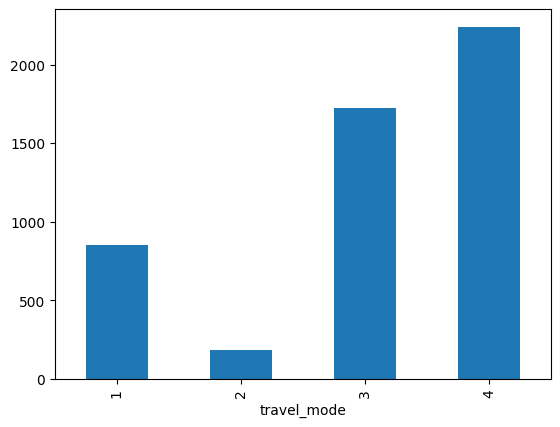

In [7]:
_ = df.groupby(['travel_mode']).count()['trip_id'].plot.bar(stacked=True)

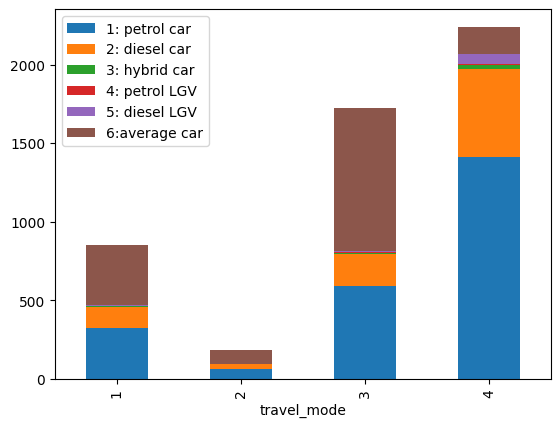

In [8]:
ax = df.groupby(['travel_mode', 'fueltype'
                 ]).count()['trip_id'].unstack().plot.bar(stacked=True)
_ = ax.legend([
    '1: petrol car',
    '2: diesel car',
    '3: hybrid car',
    '4: petrol LGV',
    '5: diesel LGV',
    '6:average car',
])

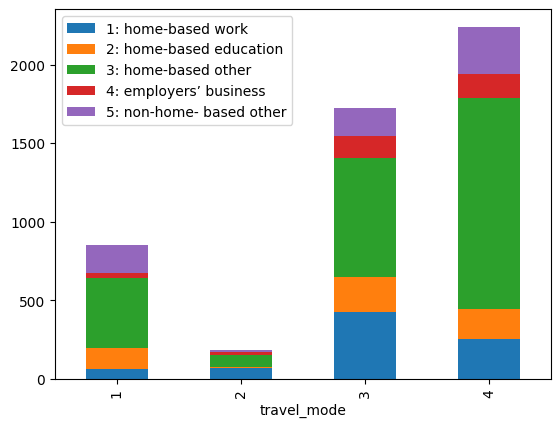

In [9]:
ax = df.groupby(['travel_mode','purpose']).count()['trip_id'].unstack().plot.bar(stacked=True)
_ = ax.legend([
    '1: home-based work',
    '2: home-based education',
    '3: home-based other',
    '4: employers’ business',
    '5: non-home- based other',
])

If we look at a continuous variable, such as `dur_walking`,
representing the predicted duration of walking route in hours, we are interested in statistics
such as the mean, the standard deviation, the minimum and maximum
values, as well as some quantiles.

In [10]:
df['dur_walking'].describe()

count    5000.000000
mean        1.097102
std         1.066575
min         0.043611
25%         0.354444
50%         0.723194
75%         1.480278
max         8.707500
Name: dur_walking, dtype: float64

It is interesting to note that 75\% of the values are lesser or equal
to 1.48, while the maximum is 8.7. 

An histogram can also be plotted.

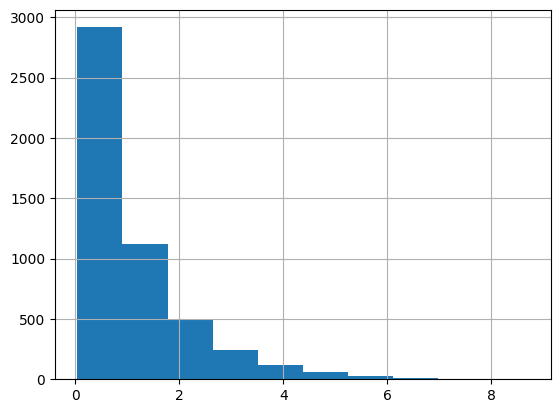

In [11]:
_ = df['dur_walking'].hist()

It may be
made more readable by using a log scale.

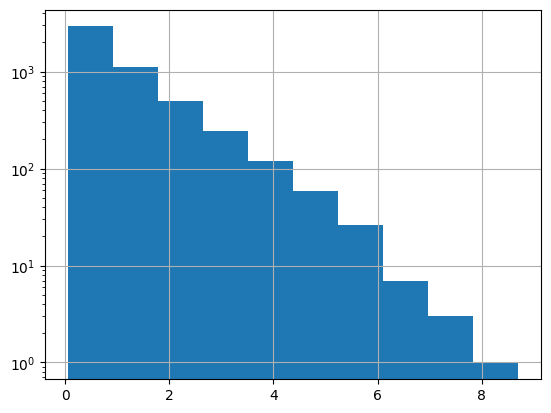

In [12]:
_ = df['dur_walking'].hist(log=True)

It is also interesting to investigate the correlation between
two variables.

In [13]:
df['dur_walking'].corr(df['distance'])

0.9964159061632911

The correlation can also be illustrated using a scatter plot.

/Users/georg/opt/anaconda3/envs/biogeme/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


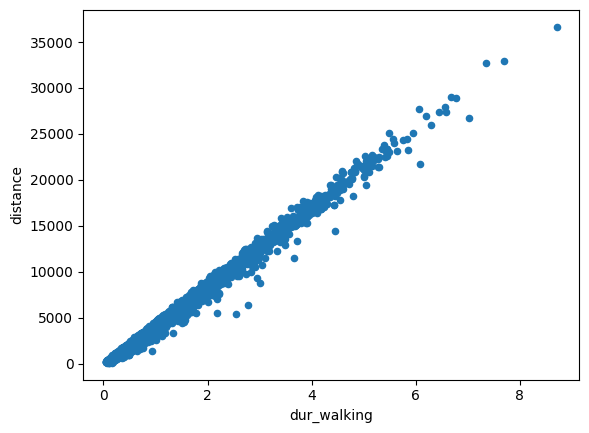

In [14]:
_ = df.plot(kind='scatter', x='dur_walking', y='distance')

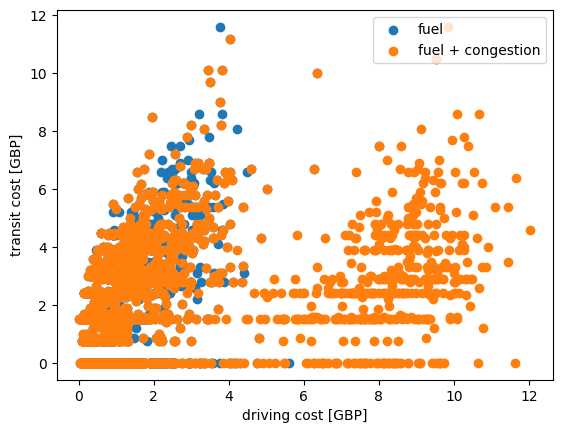

In [15]:
_ = plt.scatter(
    df.cost_driving_fuel, df.cost_transit, label='fuel')
_ = plt.scatter(
    df.cost_driving_fuel +
    df.cost_driving_ccharge * df.driving_traffic_percent,
    df.cost_transit, label='fuel + congestion')
plt.ylabel('transit cost [GBP]' )
plt.xlabel('driving cost [GBP]' )
_ = plt.legend()

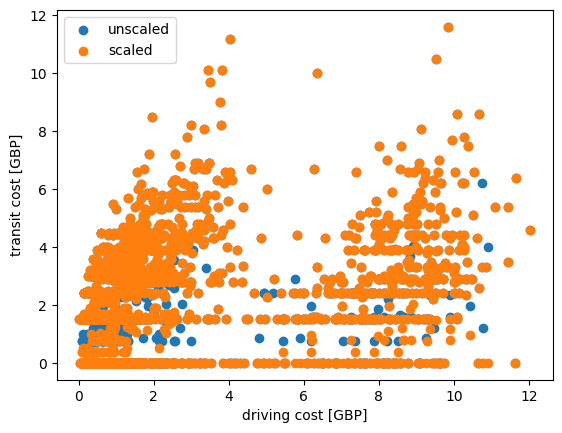

In [16]:
_ = plt.scatter(
    df.cost_driving_fuel +
    df.cost_driving_ccharge * df.driving_traffic_percent,
    df.cost_transit, label='unscaled')
_ = plt.scatter(
    df.cost_driving_fuel +
    df.cost_driving_ccharge * df.driving_traffic_percent,
    df.cost_transit*df.bus_scale, label='scaled')
plt.ylabel('transit cost [GBP]' )
plt.xlabel('driving cost [GBP]' )
_ = plt.legend()

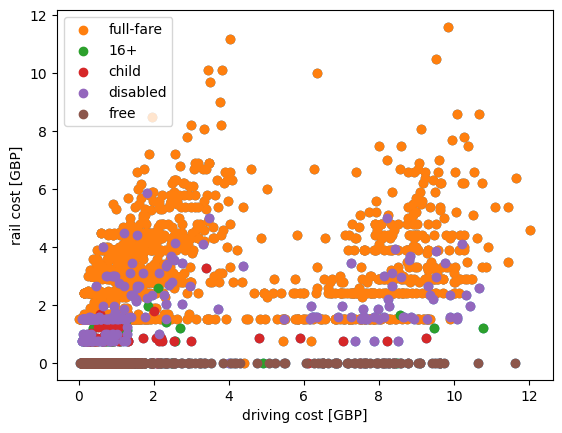

In [17]:
_ = plt.scatter(
    df.cost_driving_fuel +
    df.cost_driving_ccharge * df.driving_traffic_percent, df.cost_transit)
_ = plt.scatter(
    df[df.faretype == 1].cost_driving_fuel +
    df[df.faretype == 1].cost_driving_ccharge *
    df[df.faretype == 1].driving_traffic_percent,
    df[df.faretype == 1].cost_transit,label='full-fare')
_ = plt.scatter(df[df.faretype == 2].cost_driving_fuel +
                df[df.faretype == 2].cost_driving_ccharge *
                df[df.faretype == 2].driving_traffic_percent,
                df[df.faretype == 2].cost_transit,
                label='16+')
_ = plt.scatter(df[df.faretype == 3].cost_driving_fuel +
                df[df.faretype == 3].cost_driving_ccharge *
                df[df.faretype == 3].driving_traffic_percent,
                df[df.faretype == 3].cost_transit,
                label='child')
_ = plt.scatter(df[df.faretype == 4].cost_driving_fuel +
                df[df.faretype == 4].cost_driving_ccharge *
                df[df.faretype == 4].driving_traffic_percent,
                df[df.faretype == 4].cost_transit,
                label='disabled')
_ = plt.scatter(df[df.faretype == 5].cost_driving_fuel +
                df[df.faretype == 5].cost_driving_ccharge *
                df[df.faretype == 5].driving_traffic_percent,
                df[df.faretype == 5].cost_transit,
                label='free')
plt.ylabel('rail cost [GBP]' )
plt.xlabel('driving cost [GBP]' )
_ = plt.legend()

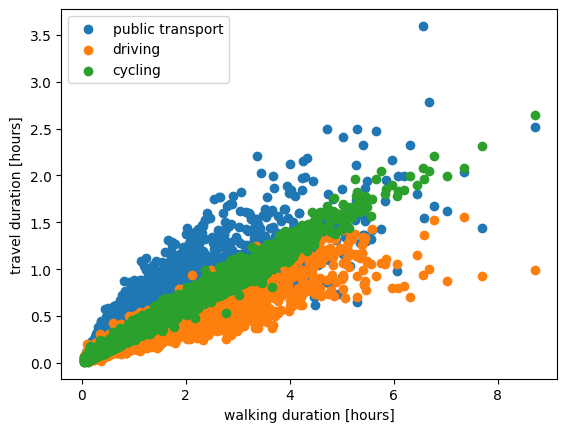

In [18]:
_ = plt.scatter(df.dur_walking,
                df.dur_pt_rail + df.dur_pt_bus + df.dur_pt_access +
                df.dur_pt_int * df.pt_interchanges,
                label='public transport')
_ = plt.scatter(df.dur_walking, df.dur_driving, label='driving')
_ = plt.scatter(df.dur_walking, df.dur_cycling, label='cycling')
plt.ylabel('travel duration [hours]')
plt.xlabel('walking duration [hours]')
_ = plt.legend()

# Model specification

We import the necessary packages and functions.

First, the interface between Biogeme and Pandas.

In [19]:
import biogeme.database as db

Then, the core of Biogeme itself.

In [20]:
import biogeme.biogeme as bio

Finally, we import some expressions that will be used to build the choice model.

In [21]:
from biogeme.expressions import Beta, Variable, log, exp, Elem, Derive

We then import the database into Biogeme.

In [22]:
database = db.Database('lpmc', df)

We identify the columns that will be used as variable in our model. 

In [23]:
travel_mode = Variable('travel_mode')
driving_license = Variable('driving_license')
fueltype = Variable('fueltype')
age = Variable('age')
dur_walking = Variable('dur_walking')
dur_cycling = Variable('dur_cycling')
dur_pt_rail = Variable('dur_pt_rail')
dur_pt_bus = Variable('dur_pt_bus')
dur_pt_access = Variable('dur_pt_access')
dur_pt_int = Variable('dur_pt_int')
pt_interchanges = Variable('pt_interchanges')
dur_driving = Variable('dur_driving')
bus_scale = Variable('bus_scale')
cost_transit = Variable('cost_transit')
cost_driving_fuel = Variable('cost_driving_fuel')
cost_driving_ccharge = Variable('cost_driving_ccharge')
driving_traffic_percent = Variable('driving_traffic_percent')
age = Variable('age')

We can aso define new variables from existing one.

In [24]:
dur_pt = database.DefineVariable(
    'dur_pt',
    dur_pt_rail + dur_pt_bus + dur_pt_access + dur_pt_int * pt_interchanges,
)

In [25]:
cost_pt = database.DefineVariable(
    'cost_pt',
    cost_transit * bus_scale,
)

In [26]:
cost_driving = database.DefineVariable(
    'cost_driving',
    cost_driving_fuel + cost_driving_ccharge * driving_traffic_percent,
)

Start with a model specification that includes alternative specific constants, and cost and travel time of the different alternatives associated with generic parameters. Report both the specification (i.e., the utility functions) and the estimation results (parameter values, t-tests or p-values, null and final log likelihoods).

We are now ready to specify the choice model. We start with a simple model, that contains only generic attributes:
\begin{align*}
V_1 &= \beta_\text{time} \text{time}_1 \\
V_2 &= \text{cte}_2 + \beta_\text{time} \text{time}_2 \\
V_3 &= \text{cte}_3 + \beta_\text{cost}  \text{cost}_3 + \beta_\text{time} \text{time}_3 \\
V_4 &= \text{cte}_4 + \beta_\text{cost}  \text{cost}_4 + \beta_\text{time} \text{time}_4 \\
\end{align*}

We define the unknown parameter using the Biogeme expression `Beta`, that takes 5 parameters:
- the name of the parameter (it is advised to use the exact same name for the corresponding Python variable),
- the starting value for the estimation (usually, 0),
- a lower bound on the value of the coefficient, or `None` for no bound,
- an upper bound, or `None`for no bound,
- a parameter that is 1 if the value of the parameter must be fixed to its starting value, and 0 if it has to be estimated.

# Model 0, generic coefficients

In [27]:
constant_2 = Beta('constant_2', 0, None, None, 0)
constant_3 = Beta('constant_3', 0, None, None, 0)
constant_4 = Beta('constant_4', 0, None, None, 0)
beta_cost = Beta('beta_cost', 0, None, None, 0)
beta_time = Beta('beta_time', 0, None, None, 0)

We now write the utility functions:

In [28]:
Opt1 = (beta_time * dur_walking)
Opt2 = (constant_2 + beta_time * dur_cycling)
Opt3 = (constant_3 + beta_cost * cost_pt + beta_time * dur_pt)
Opt4 = (constant_4 + beta_cost * cost_driving + beta_time * dur_driving)

We associate each utility function with the id of the corresponding alternative. It must be consistent with the definition of the chosen alternative.

In [29]:
V = {1: Opt1, 2: Opt2, 3: Opt3, 4: Opt4}

We obtain the choice model, that is a logit model. As Biogeme requests the contribution of each observation to the log likelihood function, we calculate the log of the logit model. $$\frac{a_i e^{V_i}}{\sum_{i=1}^J a_j e^{V_j}}$$

We import a catalog of models, including the logit model.

In [30]:
from biogeme import models
from biogeme import results as res

In [31]:
logprob = models.loglogit(V, None, travel_mode)

We initialize Biogeme with this expression, and the database.

In [32]:
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'logit_lpmc_base'

The results will be stored in a dict.

In [33]:
all_results = {}

We are now ready to estimate the parameter. Biogeme tries to read a file `__logit_lpmc_base.iter` containing intermediary results from a previous estimation run. If it does not find it, it triggers a warning that can be ignored.

In [34]:
all_results['Base'] =  biogeme.estimate()

We first display some summary information:

In [35]:
print(all_results['Base'].printGeneralStatistics())

Number of estimated parameters:	5
Sample size:	5000
Excluded observations:	0
Init log likelihood:	-4837.64
Final log likelihood:	-4837.64
Likelihood ratio test for the init. model:	-0
Rho-square for the init. model:	0
Rho-square-bar for the init. model:	-0.00103
Akaike Information Criterion:	9685.281
Bayesian Information Criterion:	9717.867
Final gradient norm:	1.8157E-02
Nbr of threads:	8



Then we display the estimation results

In [36]:
all_results['Base'].getEstimatedParameters()

,Value,Rob. Std err,Rob. t-test,Rob. p-value
beta_cost,-0.217267,0.016727,-12.989313,0.000000e+00
beta_time,-4.583652,0.188989,-24.253600,0.000000e+00
constant_2,-3.407951,0.101156,-33.690105,0.000000e+00
constant_3,-0.306573,0.055020,-5.572056,2.517502e-08
constant_4,-0.956693,0.078542,-12.180602,0.000000e+00


# Model 1, alternative specific time coefficient

Using Model 0 as the base model, include alternative- specific parameters for one of the attributes of Model 0. Report both the specification and the estimation results (as defined previously).

\begin{align*}
V_1 &= \beta_\text{time,1} \text{time}_1 \\
V_2 &= \text{cte}_2 + \beta_\text{time,2} \text{time}_2 \\
V_3 &= \text{cte}_3 + \beta_\text{cost}  \text{cost}_3 + \beta_\text{time,3} \text{time}_3 \\
V_4 &= \text{cte}_4 + \beta_\text{cost}  \text{cost}_4 + \beta_\text{time,4} \text{time}_4 \\
\end{align*}

In [37]:
constant_2 = Beta('constant_2', 0, None, None, 0)
constant_3 = Beta('constant_3', 0, None, None, 0)
constant_4 = Beta('constant_4', 0, None, None, 0)
beta_cost = Beta('beta_cost', 0, None, None, 0)
beta_time_1 = Beta('beta_time_1', 0, None, None, 0)
beta_time_2 = Beta('beta_time_2', 0, None, None, 0)
beta_time_3 = Beta('beta_time_3', 0, None, None, 0)
beta_time_4 = Beta('beta_time_4', 0, None, None, 0)
Opt1_alt_spec = (beta_time_1 * dur_walking)
Opt2_alt_spec = (constant_2 + beta_time_2 * dur_cycling)
Opt3_alt_spec = (constant_3 + beta_cost * cost_pt + beta_time_3 * dur_pt)
Opt4_alt_spec = (constant_4 + beta_cost * cost_driving +
                 beta_time_4 * dur_driving)
V_alt_spec = {
    1: Opt1_alt_spec,
    2: Opt2_alt_spec,
    3: Opt3_alt_spec,
    4: Opt4_alt_spec
}
logprob_alt_spec = models.loglogit(V_alt_spec, None, travel_mode)
biogeme_alt_spec = bio.BIOGEME(database, logprob_alt_spec)
biogeme_alt_spec.modelName = 'logit_lpmc_alt_spec'
all_results['Alt. spec.'] = biogeme_alt_spec.estimate()

In [38]:
print(all_results['Alt. spec.'].printGeneralStatistics())

Number of estimated parameters:	8
Sample size:	5000
Excluded observations:	0
Init log likelihood:	-4375.85
Final log likelihood:	-4375.85
Likelihood ratio test for the init. model:	6.63731e-08
Rho-square for the init. model:	7.58e-12
Rho-square-bar for the init. model:	-0.00183
Akaike Information Criterion:	8767.7
Bayesian Information Criterion:	8819.837
Final gradient norm:	9.1220E-03
Nbr of threads:	8



In [39]:
all_results['Alt. spec.'].getEstimatedParameters()

,Value,Rob. Std err,Rob. t-test,Rob. p-value
beta_cost,-0.202341,0.018845,-10.736851,0.0
beta_time_1,-8.529398,0.370743,-23.006259,0.0
beta_time_2,-5.584310,0.445763,-12.527543,0.0
beta_time_3,-3.147052,0.234275,-13.433128,0.0
beta_time_4,-6.858916,0.396436,-17.301438,0.0
constant_2,-4.548469,0.179697,-25.311894,0.0
constant_3,-2.497109,0.125931,-19.829198,0.0
constant_4,-1.853711,0.120485,-15.385400,0.0


In [40]:
all_results['Alt. spec.'].likelihood_ratio_test(all_results['Base'], 0.05)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=923.5807146781699, threshold=7.814727903251179)

# Model 2, socioeconomic interaction

Using Model 1 as the base model, include one additional alternative attribute and one interaction of a socioeconomic characteristic with either the ASCs or one of the attributes. Report both the specification and the estimation results (as defined previously).

\begin{align*}
V_1 &= \beta_\text{time,1} \text{time}_1\left(\frac{age}{100}\right) \\
V_2 &= \text{cte}_2 + \beta_\text{time,2} \text{time}_2\left(\frac{age}{100}\right) \\
V_3 &= \text{cte}_3 + \beta_\text{cost}  \text{cost}_3 + \beta_\text{time,3} \text{time}_3\left(\frac{age}{100}\right) \\
V_4 &= \text{cte}_4 + \beta_\text{cost}  \text{cost}_4 + \beta_\text{time,4} \text{time}_4\left(\frac{age}{100}\right)  + {\sum_{j=1}^{J-1} \beta_\text{fuel}^j\delta_j } \\
\end{align*}

In [41]:
constant_2 = Beta('constant_2', 0, None, None, 0)
constant_3 = Beta('constant_3', 0, None, None, 0)
constant_4 = Beta('constant_4', 0, None, None, 0)
beta_cost = Beta('beta_cost', 0, None, None, 0)
beta_time_1 = Beta('beta_time_1', 0, None, None, 0)
beta_time_2 = Beta('beta_time_2', 0, None, None, 0)
beta_time_3 = Beta('beta_time_3', 0, None, None, 0)
beta_time_4 = Beta('beta_time_4', 0, None, None, 0)
beta_fuel_type_123 = Beta('beta_fuel_type_123', 0, None, None, 0)
beta_fuel_type_45 = Beta('beta_fuel_type_45', 0, None, None, 0)
Opt1_socioeco = (beta_time_1 * dur_walking * (age / 100))
Opt2_socioeco = (constant_2 + beta_time_2 * dur_cycling * (age / 100))
Opt3_socioeco = (constant_3 + beta_cost * cost_pt + beta_time_3 * dur_pt *
                 (age / 100))
Opt4_socioeco = (constant_4 + beta_cost * cost_driving +
                 beta_time_4 * dur_driving * (age / 100) + beta_fuel_type_123 *
                 ((fueltype == 1) | (fueltype == 2) | (fueltype == 3) |
                  (fueltype == 4)) + beta_fuel_type_45 * ((fueltype == 4) |
                                                          (fueltype == 5)))
V_socioeco = {
    1: Opt1_socioeco,
    2: Opt2_socioeco,
    3: Opt3_socioeco,
    4: Opt4_socioeco
}

logprob_socioeco = models.loglogit(V_socioeco, None, travel_mode)
biogeme_socioeco = bio.BIOGEME(database, logprob_socioeco)
biogeme_socioeco.modelName = 'logit_lpmc_socioeco'
all_results['Socioeco.'] = biogeme_socioeco.estimate()

In [42]:
print(all_results['Socioeco.'].printGeneralStatistics())

Number of estimated parameters:	10
Sample size:	5000
Excluded observations:	0
Init log likelihood:	-4120.895
Final log likelihood:	-4120.895
Likelihood ratio test for the init. model:	-0
Rho-square for the init. model:	0
Rho-square-bar for the init. model:	-0.00243
Akaike Information Criterion:	8261.791
Bayesian Information Criterion:	8326.963
Final gradient norm:	1.7694E-02
Nbr of threads:	8



In [43]:
socioeco_estimates = all_results['Socioeco.'].getEstimatedParameters()
socioeco_estimates

,Value,Rob. Std err,Rob. t-test,Rob. p-value
beta_cost,-0.194949,0.020602,-9.462566,0.0
beta_fuel_type_123,2.430359,0.092627,26.238027,0.0
beta_fuel_type_45,2.957180,0.291300,10.151660,0.0
beta_time_1,-16.126538,0.646841,-24.931224,0.0
beta_time_2,-13.769144,1.270806,-10.834968,0.0
beta_time_3,-8.653043,0.637559,-13.572152,0.0
beta_time_4,-16.257464,1.069463,-15.201526,0.0
constant_2,-3.577606,0.153487,-23.308800,0.0
constant_3,-1.307433,0.086481,-15.118119,0.0
constant_4,-2.762014,0.116809,-23.645621,0.0


# Davidson McKinnon test

We test the null hypothesis that the alternative specific model is the true model. To test this hypothesis, we need to perform a **Davidson McKinnon test**, where $M_1$ is the alternative specific model, and $M_2$ is the socioeconomic model.

We write a composite specification.

In [44]:
alpha = Beta('alpha', 0, None, None, 0)

We fix the values of the parameters of the socioeconomic specification to their estimated value. We also change the name of the beta to avoid duplicates in the composite model.

In [45]:
socioeco_betas = all_results['Socioeco.'].getBetaValues()
socioeco_betas

{'beta_cost': -0.19494867198115687,
 'beta_fuel_type_123': 2.4303592575107182,
 'beta_fuel_type_45': 2.957180107851512,
 'beta_time_1': -16.126537989417205,
 'beta_time_2': -13.769143882941922,
 'beta_time_3': -8.653042803486636,
 'beta_time_4': -16.257463751357104,
 'constant_2': -3.577605854057555,
 'constant_3': -1.3074325466619154,
 'constant_4': -2.762014013879864}

In [46]:
Opt1_socioeco.fix_betas(beta_values=socioeco_betas, prefix='socioeco_')
Opt2_socioeco.fix_betas(beta_values=socioeco_betas, prefix='socioeco_')
Opt3_socioeco.fix_betas(beta_values=socioeco_betas, prefix='socioeco_')
Opt4_socioeco.fix_betas(beta_values=socioeco_betas, prefix='socioeco_')

We create the composite specification

In [47]:
Opt1_compo = (1-alpha) * Opt1_alt_spec + alpha * Opt1_socioeco
Opt2_compo = (1-alpha) * Opt2_alt_spec + alpha * Opt2_socioeco
Opt3_compo = (1-alpha) * Opt3_alt_spec + alpha * Opt3_socioeco
Opt4_compo = (1-alpha) * Opt3_alt_spec + alpha * Opt3_socioeco

We estimate the composite model

In [48]:
V_compo = {1: Opt1_compo, 2: Opt2_compo, 3: Opt3_compo, 4: Opt4_compo}
logprob_compo = models.loglogit(V_compo, None, travel_mode)
biogeme_compo = bio.BIOGEME(database, logprob_compo)
biogeme_compo.modelName = 'logit_lpmc_compo'
results_compo = biogeme_compo.estimate()

In [49]:
composite_parameters = results_compo.getEstimatedParameters()
composite_parameters

,Value,Rob. Std err,Rob. t-test,Rob. p-value
alpha,0.314365,0.065205,4.821164,1.427231e-06
beta_cost,-0.443103,0.079800,-5.552670,2.813382e-08
beta_time_1,-7.533126,0.648542,-11.615474,0.000000e+00
beta_time_2,-1.074099,0.777999,-1.380592,1.674043e-01
beta_time_3,1.356882,0.696212,1.948950,5.130145e-02
constant_2,-4.670181,0.280150,-16.670271,0.000000e+00
constant_3,-2.481741,0.213371,-11.631128,0.000000e+00


$t$-test for $\alpha$.

In [50]:
composite_parameters.loc['alpha', 'Rob. t-test']

4.8211638509454255

$p$-value for $\alpha$.

In [51]:
print(composite_parameters.loc['alpha', 'Rob. p-value'])

1.4272306425588965e-06


Under the null hypothesis, the true value of $\alpha$ is 0. This hypothesis can be safely rejected here. Therefore, the socioeconomic specification is preferred.

# Model 3, non-linear

In [52]:
# Running this code unfixes the socioeco. betas
constant_2 = Beta('constant_2', 0, None, None, 0)
constant_3 = Beta('constant_3', 0, None, None, 0)
constant_4 = Beta('constant_4', 0, None, None, 0)
beta_cost = Beta('beta_cost', 0, None, None, 0)
beta_time_1 = Beta('beta_time_1', 0, None, None, 0)
beta_time_2 = Beta('beta_time_2', 0, None, None, 0)
beta_time_3 = Beta('beta_time_3', 0, None, None, 0)
beta_time_4 = Beta('beta_time_4', 0, None, None, 0)
beta_fuel_type_123 = Beta('beta_fuel_type_123', 0, None, None, 0)
beta_fuel_type_45 = Beta('beta_fuel_type_45', 0, None, None, 0)
Opt1_socioeco = (beta_time_1 * dur_walking * (age / 100))
Opt2_socioeco = (constant_2 + beta_time_2 * dur_cycling * (age / 100))
Opt3_socioeco = (constant_3 + beta_cost * cost_pt + beta_time_3 * dur_pt *
                 (age / 100))
Opt4_socioeco = (constant_4 + beta_cost * cost_driving +
                 beta_time_4 * dur_driving * (age / 100) + beta_fuel_type_123 *
                 ((fueltype == 1) | (fueltype == 2) | (fueltype == 3) |
                  (fueltype == 4)) + beta_fuel_type_45 * ((fueltype == 4) |
                                                          (fueltype == 5)))
V_socioeco = {
    1: Opt1_socioeco,
    2: Opt2_socioeco,
    3: Opt3_socioeco,
    4: Opt4_socioeco
}

logprob_socioeco = models.loglogit(V_socioeco, None, travel_mode)
biogeme_socioeco = bio.BIOGEME(database, logprob_socioeco)
biogeme_socioeco.modelName = 'logit_lpmc_socioeco'
all_results['Socioeco.'] = biogeme_socioeco.estimate()

Using Model 2 as the base model, include an appropriate non-linear transformation of one of the variables. Report both the specification and the estimation results (as defined previously).

In [53]:
ell = Beta('ell', 1, None, None, 0)

\begin{align*}
V_1 &= \beta_\text{time,1} \text{time}_1\left(\frac{age}{100}\right)^{\ell} \\
V_2 &= \text{cte}_2 + \beta_\text{time,2} \text{time}_2\left(\frac{age}{100}\right)^{\ell} \\
V_3 &= \text{cte}_3 + \beta_\text{cost}  \text{cost}_3 + \beta_\text{time,3} \text{time}_3\left(\frac{age}{100}\right)^{\ell} \\
V_4 &= \text{cte}_4 + \beta_\text{cost}  \text{cost}_4 + \beta_\text{time,4} \text{time}_4\left(\frac{age}{100}\right)^{\ell}  + {\sum_{j=1}^{J-1} \beta_\text{fuel}^j\delta_j } \\
\end{align*}

In [54]:
constant_2 = Beta('constant_2', 0, None, None, 0)
constant_3 = Beta('constant_3', 0, None, None, 0)
constant_4 = Beta('constant_4', 0, None, None, 0)
beta_cost = Beta('beta_cost', 0, None, None, 0)
beta_time_1 = Beta('beta_time_1', 0, None, None, 0)
beta_time_2 = Beta('beta_time_2', 0, None, None, 0)
beta_time_3 = Beta('beta_time_3', 0, None, None, 0)
beta_time_4 = Beta('beta_time_4', 0, None, None, 0)
beta_fuel_type_123 = Beta('beta_fuel_type_123', 0, None, None, 0)
beta_fuel_type_45 = Beta('beta_fuel_type_45', 0, None, None, 0)
Opt1_nonlinear = (beta_time_1 * dur_walking * (age / 100)**ell)
Opt2_nonlinear = (constant_2 + beta_time_2 * dur_cycling * (age / 100)**ell)
Opt3_nonlinear = (constant_3 + beta_cost * cost_pt + beta_time_3 * dur_pt *
                 (age / 100)**ell)
Opt4_nonlinear = (constant_4 + beta_cost * cost_driving +
                 beta_time_4 * dur_driving * (age / 100)**ell + beta_fuel_type_123 *
                 ((fueltype == 1) | (fueltype == 2) | (fueltype == 3) |
                  (fueltype == 4)) + beta_fuel_type_45 * ((fueltype == 4) |
                                                          (fueltype == 5)))
V_nonlinear = {
    1: Opt1_nonlinear,
    2: Opt2_nonlinear,
    3: Opt3_nonlinear,
    4: Opt4_nonlinear
}

logprob_nonlinear = models.loglogit(V_nonlinear, None, travel_mode)
biogeme_nonlinear = bio.BIOGEME(database, logprob_nonlinear)
biogeme_nonlinear.modelName = 'logit_lpmc_nonlinear'
all_results['Nonlinear.'] = biogeme_nonlinear.estimate()

In [55]:
print(all_results['Nonlinear.'].printGeneralStatistics())

Number of estimated parameters:	11
Sample size:	5000
Excluded observations:	0
Init log likelihood:	-3892.398
Final log likelihood:	-3892.398
Likelihood ratio test for the init. model:	2.680299e-07
Rho-square for the init. model:	3.44e-11
Rho-square-bar for the init. model:	-0.00283
Akaike Information Criterion:	7806.796
Bayesian Information Criterion:	7878.486
Final gradient norm:	2.4045E-02
Nbr of threads:	8



In [56]:
nonlinear_estimates = all_results['Nonlinear.'].getEstimatedParameters()
nonlinear_estimates

,Value,Rob. Std err,Rob. t-test,Rob. p-value
beta_cost,-0.212166,0.021652,-9.798791,0.000000
beta_fuel_type_123,2.408309,0.092566,26.017250,0.000000
beta_fuel_type_45,3.131389,0.298679,10.484140,0.000000
beta_time_1,-9.315314,0.543253,-17.147289,0.000000
beta_time_2,-5.640613,0.540203,-10.441659,0.000000
beta_time_3,-2.975948,0.303201,-9.815102,0.000000
beta_time_4,-6.807138,0.489666,-13.901592,0.000000
constant_2,-4.596789,0.186570,-24.638467,0.000000
constant_3,-2.590865,0.134635,-19.243553,0.000000
constant_4,-3.723677,0.152516,-24.414973,0.000000


# Test non linear specifications

In [57]:
from scipy.stats import norm
from biogeme.results import calcPValue

Under the null hypothesis, the statistic $$\frac{\widehat{\lambda}-1}{\widehat{\sigma}_\lambda}$$ follows approximatively a $N(0, 1)$. 

In [58]:
t_test_lambda = (nonlinear_estimates.loc['ell', 'Value'] -
                 1) / nonlinear_estimates.loc['ell', 'Rob. Std err']
t_test_lambda

-28.068463474057985

The threshold for the 5% confidence level is...

In [59]:
norm.ppf(.95)

1.6448536269514722

Therefore, the null hypothesis can be rejected at the 10% level of confidence. 

In [60]:
calcPValue(t_test_lambda)

0.0

##### If we reject the null hypothesis that the true model is the linear model, there is a 0.0% probability to make an error.

In [61]:
all_results['Nonlinear.'].likelihood_ratio_test(all_results['Socioeco.'], 0.05)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=456.99417180480395, threshold=3.841458820694124)

# Model 4, nested

Using Model 3 as the base model, propose and test a nested or cross-nested structure. Report the nesting structure by means of a graph, together with the specification and the estimation results (as defined previously).

There are three possibilities to partition the choice set:

- [walking, cycling]  and [public transport, driving],
- [walking, cycling, driving] and [public transport],
- [walking] and [cycling, public transport, driving].

The first one groups motorized alternatives together. The second one groups private modes together. The third one groups vehicular modes together. 

In [62]:
MU = Beta('MU', 1, 0, None, 0)
pedestrian = 1, [1]
vehicular = MU, [2, 3, 4]
nests = pedestrian, vehicular
logprob_nested = models.lognested(V_nonlinear, None, nests, travel_mode)
biogeme_nested = bio.BIOGEME(database, logprob_nested)
biogeme_nested.modelName = 'logit_lpmc_nested'
all_results['Nested.'] = biogeme_nested.estimate()

In [63]:
all_results['Nested.'].likelihood_ratio_test(all_results['Nonlinear.'], significance_level=0.05)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=16.943699561491485, threshold=3.841458820694124)

# Comparison of the results

In [64]:
res.compileEstimationResults(all_results)

,Base,Alt. spec.,Socioeco.,Nonlinear.,Nested.
Number of estimated parameters,5,8,10,11,12
Sample size,5000,5000,5000,5000,5000
Final log likelihood,-4837.640324,-4375.849966,-4120.895316,-3892.39823,-3883.92638
Akaike Information Criterion,9685.280647,8767.699933,8261.790631,7806.796459,7791.85276
Bayesian Information Criterion,9717.866613,8819.837478,8326.962563,7878.485585,7870.059078
beta_cost,-0.217267,-0.202341,-0.194949,-0.212166,-0.143401
beta_time,-4.583652,,,,
constant_2,-3.407951,-4.548469,-3.577606,-4.596789,-3.626451
constant_3,-0.306573,-2.497109,-1.307433,-2.590865,-2.280683
constant_4,-0.956693,-1.853711,-2.762014,-3.723677,-3.049967


# Market shares

We consider four segments of the population, characterized by two age categories  (41 or older, and 40 or younger), and gender. 

The census data report the following number $N_g$ of individuals in each segment $g$.

In [65]:
census = {
    'male_41_more':  1633263,
    'male_40_less':  2676249,
    'female_41_more':  1765143,
    'female_40_less':  2599058,
}

The total size $N$ of the population is the sum over all segments.

In [66]:
total = sum(census.values())
total

8673713

Identify each segment in the database.

In [67]:
filters = {
    'male_41_more': (df.age > 40) & (df.female == 0),
    'male_40_less': (df.age <= 40) & (df.female == 0),
    'female_41_more': (df.age > 40) & (df.female == 1),
    'female_40_less': (df.age <= 40) & (df.female == 1),
}

We count the number 
$S_g$ of individuals in each segment $g$ in the sample.

In [68]:
sample_segments = {
    k: v.sum() for k, v in filters.items()
}
sample_segments

{'male_41_more': 1122,
 'male_40_less': 1236,
 'female_41_more': 1166,
 'female_40_less': 1476}

We check the total sample size $S$.

In [69]:
total_sample = sum(sample_segments.values())
total_sample

5000

The weight $w_g$ associated with segment $g$ is defined as
$$
w_g = \frac{N_g}{N}\frac{S}{S_g}.
$$

In [70]:
weights = {
    k: census[k] * total_sample / (v * total) 
    for k, v in sample_segments.items()
}
weights

{'male_41_more': 0.8391280199118027,
 'male_40_less': 1.2481678838116963,
 'female_41_more': 0.8726624736367851,
 'female_40_less': 1.015066675479139}

We insert the weight as a new column in the database.

In [71]:
for k, f in filters.items():
    df.loc[f, 'Weight'] = weights[k] 

We check that the sum of the weights is the sample size.

In [72]:
sum_weights = df['Weight'].sum()
sum_weights

5000.0

# Perform sample enumeration

In [73]:
biogeme_nested = bio.BIOGEME(database, logprob_nested)
biogeme_nested.modelName = 'logit_lpmc_nested'
results = biogeme_nested.estimate()

We calculate the choice probability of each alternative for each observation. We include the weight in the simulation results.

In [74]:
Weight = Variable('Weight')

In [75]:
prob_walk = models.nested(V_nonlinear, None, nests, 1)
prob_bike = models.nested(V_nonlinear, None, nests, 2)
prob_tran = models.nested(V_nonlinear, None, nests, 3)
prob_auto = models.nested(V_nonlinear, None, nests, 4)

In [76]:
simulate = {
    'Weight': Weight,
    'Prob. walk': prob_walk,
    'Prob. bike': prob_bike,
    'Prob. tran': prob_tran,
    'Prob. auto': prob_auto,
}

In [77]:
biosim = bio.BIOGEME(database, simulate)
simulated_values = biosim.simulate(results.getBetaValues())

In [78]:
simulated_values['walk'] = (df.travel_mode==1).astype(int)
simulated_values['bike'] = (df.travel_mode==2).astype(int)
simulated_values['tran'] = (df.travel_mode==3).astype(int)
simulated_values['auto'] = (df.travel_mode==4).astype(int)

Market shares are calculated using the weighted mean of the
individual probabilities.

In [79]:
simulated_values['Weighted walk'] = (
    simulated_values['Weight'] * 
    simulated_values['Prob. walk']
)
simulated_values['Weighted bike'] = (
    simulated_values['Weight'] * 
    simulated_values['Prob. bike']
)
simulated_values['Weighted tran'] = (
    simulated_values['Weight'] * 
    simulated_values['Prob. tran']
)
simulated_values['Weighted auto'] = (
    simulated_values['Weight'] * 
    simulated_values['Prob. auto']
)

In [80]:
market_share_walk = simulated_values['Weighted walk'].mean()
print(f'Market share for walk: {100*market_share_walk:.1f}%')
market_share_bike = simulated_values['Weighted bike'].mean()
print(f'Market share for bike: {100*market_share_bike:.1f}%')
market_share_tran = simulated_values['Weighted tran'].mean()
print(f'Market share for tran: {100*market_share_tran:.1f}%')
market_share_auto = simulated_values['Weighted auto'].mean()
print(f'Market share for auto: {100*market_share_auto:.1f}%')

Market share for walk: 17.0%
Market share for bike: 3.7%
Market share for tran: 34.9%
Market share for auto: 44.4%


In [81]:
simulated_values['Choose walk'] = (
    simulated_values['Weight'] * 
    simulated_values['walk']
)
simulated_values['Choose bike'] = (
    simulated_values['Weight'] * 
    simulated_values['bike']
)
simulated_values['Choose tran'] = (
    simulated_values['Weight'] * 
    simulated_values['tran']
)
simulated_values['Choose auto'] = (
    simulated_values['Weight'] * 
    simulated_values['auto']
)

In [82]:
real_share_walk = simulated_values['Choose walk'].mean()
print(f'Real share for walk: {100*real_share_walk:.1f}%')
real_share_bike = simulated_values['Choose bike'].mean()
print(f'Real share for bike: {100*real_share_bike:.1f}%')
real_share_tran = simulated_values['Choose tran'].mean()
print(f'Real share for tran: {100*real_share_tran:.1f}%')
real_share_auto = simulated_values['Choose auto'].mean()
print(f'Real share for auto: {100*real_share_auto:.1f}%')

Real share for walk: 17.2%
Real share for bike: 3.8%
Real share for tran: 35.1%
Real share for auto: 43.9%


# Confidence intervals

In order to calculate confidence intervals, we need to re-estimate the parameters using bootstrapping.

In [83]:
results_bootstrapping = biogeme_nested.estimate(bootstrap=100)

100%|█████████████████████████████████████████| 100/100 [02:07<00:00,  1.27s/it]


We obtain a sample of values for the parameters. We use then to calculate empirically (that is, using simulation), the 90% confidence intervals on the simulated quantities.

In [84]:
betas = biogeme_nested.freeBetaNames()
b = results_bootstrapping.getBetasForSensitivityAnalysis(betas)

In [85]:
left, right = biosim.confidenceIntervals(b, 0.9)

In [86]:
left['Weighted walk'] = (
    left['Weight'] * 
    left['Prob. walk']
)
left['Weighted bike'] = (
    left['Weight'] * 
    left['Prob. bike']
)
left['Weighted tran'] = (
    left['Weight'] * 
    left['Prob. tran']
)
left['Weighted auto'] = (
    left['Weight'] * 
    left['Prob. auto']
)

In [87]:
left_market_share_walk = left['Weighted walk'].mean()
left_market_share_bike = left['Weighted bike'].mean()
left_market_share_tran = left['Weighted tran'].mean()
left_market_share_auto = left['Weighted auto'].mean()

In [88]:
right['Weighted walk'] = (
    right['Weight'] * 
    right['Prob. walk']
)
right['Weighted bike'] = (
    right['Weight'] * 
    right['Prob. bike']
)
right['Weighted tran'] = (
    right['Weight'] * 
    right['Prob. tran']
)
right['Weighted auto'] = (
    right['Weight'] * 
    right['Prob. auto']
)

In [89]:
right_market_share_walk = right['Weighted walk'].mean()
right_market_share_bike = right['Weighted bike'].mean()
right_market_share_tran = right['Weighted tran'].mean()
right_market_share_auto = right['Weighted auto'].mean()

In [90]:
print(
    f'Market share for walk: {100*market_share_walk:.1f}% '
    f'CI: ['
    f'{100*left_market_share_walk:.1f}%-'
    f'{100*right_market_share_walk:.1f}'
    f']'
)

Market share for walk: 17.0% CI: [15.6%-18.5]


In [91]:
print(
    f'Market share for bike: {100*market_share_bike:.1f}% '
    f'CI: ['
    f'{100*left_market_share_bike:.1f}%-'
    f'{100*right_market_share_bike:.1f}'
    f']'
)

Market share for bike: 3.7% CI: [3.1%-4.4]


In [92]:
print(
    f'Market share for tran: {100*market_share_tran:.1f}% '
    f'CI: ['
    f'{100*left_market_share_tran:.1f}%-'
    f'{100*right_market_share_tran:.1f}'
    f']'
)

Market share for tran: 34.9% CI: [32.8%-37.0]


In [93]:
print(
    f'Market share for auto: {100*market_share_auto:.1f}% '
    f'CI: ['
    f'{100*left_market_share_auto:.1f}%-'
    f'{100*right_market_share_auto:.1f}'
    f']'
)

Market share for auto: 44.4% CI: [42.2%-46.5]


# Forecasting

Consider the following scenarios: (i) an increase of car cost by 15%; and (ii) a decrease of public transport cost by 15%.

In [94]:
def forecasting(scales=[1, 1]):
    ell = Beta('ell', 1, None, None, 0)
    constant_2 = Beta('constant_2', 0, None, None, 0)
    constant_3 = Beta('constant_3', 0, None, None, 0)
    constant_4 = Beta('constant_4', 0, None, None, 0)
    beta_cost = Beta('beta_cost', 0, None, None, 0)
    beta_time_1 = Beta('beta_time_1', 0, None, None, 0)
    beta_time_2 = Beta('beta_time_2', 0, None, None, 0)
    beta_time_3 = Beta('beta_time_3', 0, None, None, 0)
    beta_time_4 = Beta('beta_time_4', 0, None, None, 0)
    beta_fuel_type_123 = Beta('beta_fuel_type_123', 0, None, None, 0)
    beta_fuel_type_45 = Beta('beta_fuel_type_45', 0, None, None, 0)
    Opt1_scenario = (beta_time_1 * dur_walking * (age / 100)**ell)
    Opt2_scenario = (constant_2 + beta_time_2 * dur_cycling * (age / 100)**ell)
    Opt3_scenario = (constant_3 + beta_cost * scales[0] * cost_pt + beta_time_3 * dur_pt *
                     (age / 100)**ell)
    Opt4_scenario = (constant_4 + beta_cost * scales[1] * cost_driving +
                     beta_time_4 * dur_driving * (age / 100)**ell + beta_fuel_type_123 *
                     ((fueltype == 1) | (fueltype == 2) | (fueltype == 3) |
                      (fueltype == 4)) + beta_fuel_type_45 * ((fueltype == 4) |
                                                              (fueltype == 5)))
    V_scenario = {
        1: Opt1_scenario,
        2: Opt2_scenario,
        3: Opt3_scenario,
        4: Opt4_scenario
    }
    prob_walk_scenario = models.nested(V_scenario, None, nests, 1)
    prob_bike_scenario = models.nested(V_scenario, None, nests, 2)
    prob_tran_scenario = models.nested(V_scenario, None, nests, 3)
    prob_auto_scenario = models.nested(V_scenario, None, nests, 4)
    vot_pt = Derive(Opt3_scenario, 'dur_pt') / Derive(Opt3_scenario, 'cost_pt')
    vot_driving = Derive(Opt4_scenario, 'dur_driving') / Derive(
        Opt4_scenario, 'cost_driving')
    direct_elas_pt_cost = (Derive(prob_tran_scenario, 'cost_pt') * cost_pt /
                           prob_tran_scenario)
    cross_elas_pt_cost = (Derive(prob_tran_scenario, 'cost_driving') * cost_driving /
                           prob_tran_scenario)
    direct_elas_auto_cost = (Derive(prob_auto_scenario, 'cost_driving') * cost_driving /
                           prob_auto_scenario)
    cross_elas_auto_cost = (Derive(prob_auto_scenario, 'cost_pt') * cost_pt /
                           prob_auto_scenario)
    simulate_scenario = {
        'Weight': Weight,
        'Prob. walk': prob_walk_scenario,
        'Prob. bike': prob_bike_scenario,
        'Prob. tran': prob_tran_scenario,
        'Prob. auto': prob_auto_scenario,
        'Revenue': prob_tran_scenario * scales[0] * cost_pt,
        'vot_pt': vot_pt,
        'vot_driving': vot_driving,
        'cost_pt': cost_pt,
        'cost_driving': cost_driving,
        'dur_pt': dur_pt,
        'dur_driving': dur_driving,
        'direct_elas_pt_cost': direct_elas_pt_cost,
        'cross_elas_pt_cost': cross_elas_pt_cost,
        'direct_elas_auto_cost': direct_elas_auto_cost,
        'cross_elas_auto_cost': cross_elas_auto_cost,
    }
    biosim_scenario = bio.BIOGEME(database, simulate_scenario)
    simulated_scenario = biosim_scenario.simulate(results.getBetaValues())
    simulated_scenario['Weighted walk'] = (simulated_scenario['Weight'] *
                                           simulated_scenario['Prob. walk'])
    simulated_scenario['Weighted bike'] = (simulated_scenario['Weight'] *
                                           simulated_scenario['Prob. bike'])
    simulated_scenario['Weighted tran'] = (simulated_scenario['Weight'] *
                                           simulated_scenario['Prob. tran'])
    simulated_scenario['Weighted auto'] = (simulated_scenario['Weight'] *
                                           simulated_scenario['Prob. auto'])
    simulated_scenario['Total revenue'] = (simulated_scenario['Weight'] *
                                           simulated_scenario['Revenue'])
    return simulated_scenario

In [95]:
simulated_scenario = forecasting(scales=[1,1.15])

In [96]:
market_share_walk_scenario = simulated_scenario['Weighted walk'].mean()
print(f'Market share for walk (increase of car cost by 15%): {100*market_share_walk_scenario:.1f}%')
market_share_bike_scenario = simulated_scenario['Weighted bike'].mean()
print(f'Market share for bike (increase of car cost by 15%): {100*market_share_bike_scenario:.1f}%')
market_share_tran_scenario = simulated_scenario['Weighted tran'].mean()
print(f'Market share for tran (increase of car cost by 15%): {100*market_share_tran_scenario:.1f}%')
market_share_auto_scenario = simulated_scenario['Weighted auto'].mean()
print(f'Market share for auto (increase of car cost by 15%): {100*market_share_auto_scenario:.1f}%')

Market share for walk (increase of car cost by 15%): 17.1%
Market share for bike (increase of car cost by 15%): 3.8%
Market share for tran (increase of car cost by 15%): 35.3%
Market share for auto (increase of car cost by 15%): 43.9%


In [97]:
simulated_scenario = forecasting(scales=[.85,1])

In [98]:
market_share_walk_scenario = simulated_scenario['Weighted walk'].mean()
print(
    f'Market share for walk (decrease of pt cost by 15%): {100*market_share_walk_scenario:.1f}%'
)
market_share_bike_scenario = simulated_scenario['Weighted bike'].mean()
print(
    f'Market share for bike (decrease of pt cost by 15%): {100*market_share_bike_scenario:.1f}%'
)
market_share_tran_scenario = simulated_scenario['Weighted tran'].mean()
print(
    f'Market share for tran (decrease of pt cost by 15%): {100*market_share_tran_scenario:.1f}%'
)
market_share_auto_scenario = simulated_scenario['Weighted auto'].mean()
print(
    f'Market share for auto (decrease of pt cost by 15%): {100*market_share_auto_scenario:.1f}%'
)

Market share for walk (decrease of pt cost by 15%): 17.0%
Market share for bike (decrease of pt cost by 15%): 3.6%
Market share for tran (decrease of pt cost by 15%): 35.5%
Market share for auto (decrease of pt cost by 15%): 43.9%


# Calculate the total revenues

Which scenario reports the highest public transportation total revenue? Explain why. Is it higher than the total revenue obtained without any of the policies? Can you explain why?

In [99]:
simulated_scenario = forecasting(scales=[.85,1])
simulated_scenario['Total revenue'].sum()

2827.8972485518107

In [100]:
simulated_scenario = forecasting(scales=[1,1.15])
simulated_scenario['Total revenue'].sum()

3275.849192704089

In [101]:
base_scenario = forecasting(scales=[1,1])
base_scenario['Total revenue'].sum()

3226.745109405945

# Value of time

Calculate the average value of time for car and public transportation. Comment on the obtained results.

We now calculate the value of time, that is the willingess to pay to save travel time.

In [102]:
base_scenario.loc[base_scenario.cost_pt == 0, 'vot_pt'] = 0
base_scenario.loc[base_scenario.cost_driving == 0, 'vot_driving'] = 0

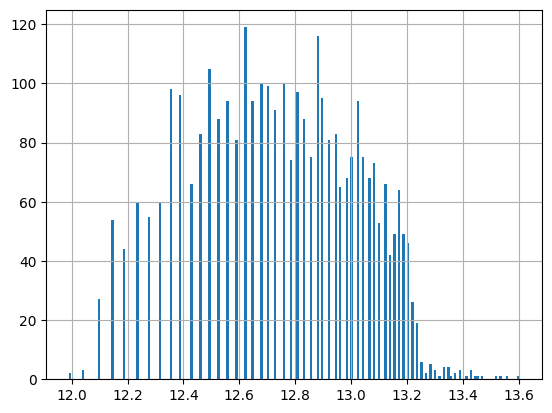

In [103]:
_ = base_scenario[base_scenario['vot_pt'] != 0]['vot_pt'].hist(bins=200)

In [104]:
avg_vot_pt = (
    base_scenario['vot_pt'] * 
    base_scenario['Weight']
).sum() / base_scenario['Weight'].sum()

In [105]:
print(f'Average value of time for PT: {avg_vot_pt:.3g} GBP/hour')

Average value of time for PT: 8.45 GBP/hour


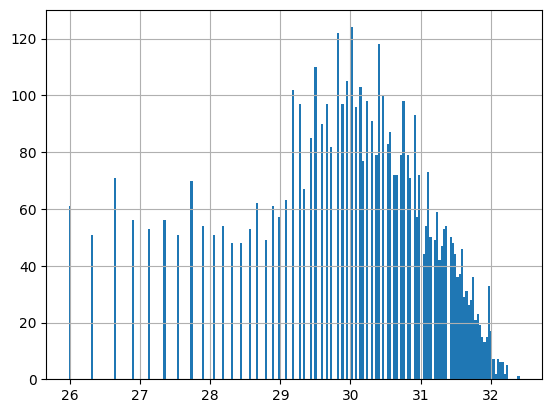

In [106]:
_ = base_scenario[base_scenario['vot_driving'] != 0]['vot_driving'].hist(bins=200)

In [107]:
avg_driving = (
    base_scenario['vot_driving'] * 
    base_scenario['Weight']
).sum() / base_scenario['Weight'].sum()

In [108]:
print(f'Average value of time for car: {avg_driving:.3g} GBP/hour')

Average value of time for car: 29.8 GBP/hour


# Elasticities

Compute the direct and cross aggregate elasticities of car cost and public transport cost and comment on the obtained results. Report the normalization factors.

The direct point elasticity of travel cost for public transportation is defined as 
$$ E_\text{cost}^{P_n(\text{PT})} = \frac{\partial P_n(\text{PT})}{\partial \text{cost(PT)}} \frac{\text{cost(PT)}}{P_n(\text{PT})}.$$

The cross point elasticity of travel cost for public transportation is defined as 
$$ E_\text{cost}^{P_n(\text{PT})} = \frac{\partial P_n(\text{PT})}{\partial \text{cost(car)}} \frac{\text{cost(car)}}{P_n(\text{PT})}.$$

The direct point elasticity of travel cost for car is defined as 
$$ E_\text{cost}^{P_n(\text{car})} = \frac{\partial P_n(\text{car})}{\partial \text{cost(car)}} \frac{\text{cost(car)}}{P_n(\text{car})}.$$

The cross point elasticity of travel cost for car is defined as 
$$ E_\text{cost}^{P_n(\text{car})} = \frac{\partial P_n(\text{car})}{\partial \text{cost(PT)}} \frac{\text{cost(PT)}}{P_n(\text{car})}.$$

Aggregate elasticities capture the relative change at the level of the market shares. They can be derived from disaggregate elasticities using the following formula:
$$E^{\widehat{W}(i)}_{x_{jk}}  =\frac{1}{\sum_{\ell=1}^{N} \omega_\ell P_\ell(i)}\sum_{n=1}^{N}\omega_n 
  P_n(i) E^{P_n(i)}_{x_{jnk}}.$$

In [109]:
base_scenario['numerator_pt_direct'] = (
    base_scenario['Weight'] *
    base_scenario['Prob. tran'] *
    base_scenario['direct_elas_pt_cost']
)

In [110]:
base_scenario['numerator_pt_cross'] = (
    base_scenario['Weight'] *
    base_scenario['Prob. tran'] *
    base_scenario['cross_elas_pt_cost']
)

In [111]:
base_scenario['denominator_pt'] = (
    base_scenario['Weight'] *
    base_scenario['Prob. tran']
)

In [112]:
agg_elast_pt_direct = base_scenario['numerator_pt_direct'].sum(
) / base_scenario['denominator_pt'].sum()
agg_elast_pt_direct

-0.12918880497875326

In [113]:
agg_elast_pt_cross = base_scenario['numerator_pt_cross'].sum(
) / base_scenario['denominator_pt'].sum()
agg_elast_pt_cross

0.08343911311705098

In [114]:
base_scenario['numerator_auto_direct'] = (
    base_scenario['Weight'] *
    base_scenario['Prob. auto'] *
    base_scenario['direct_elas_auto_cost']
)

In [115]:
base_scenario['numerator_auto_cross'] = (
    base_scenario['Weight'] *
    base_scenario['Prob. auto'] *
    base_scenario['cross_elas_auto_cost']
)

In [116]:
base_scenario['denominator_auto'] = (
    base_scenario['Weight'] *
    base_scenario['Prob. auto']
)

In [117]:
agg_elast_auto_direct = base_scenario['numerator_auto_direct'].sum(
) / base_scenario['denominator_auto'].sum()
agg_elast_auto_direct

-0.0774690927114544

In [118]:
agg_elast_auto_cross = base_scenario['numerator_auto_cross'].sum(
) / base_scenario['denominator_auto'].sum()
agg_elast_auto_cross

0.07660064598098186

We note that the demand is inelastic for both those indicators, as they are less than one (in absolute value).